In [2]:
import pandas as pd
import numpy as np

How many members' books are in the dataset?

In [3]:
sco_books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
sco_books.sample(5)

,uri,title,author,editor,translator,introduction,illustrator,photographer,year,format,uncertain,ebook_url,volumes_issues,notes,event_count,borrow_count,purchase_count,circulation_years,updated
4467,https://shakespeareandco.princeton.edu/books/l...,Ripeness Is All,"Linklater, Eric",NaN,NaN,NaN,NaN,NaN,1935,Book,False,NaN,NaN,NaN,14,14,0,1936;1937;1940;1935,2020-04-30T19:40:16+00:00
315,https://shakespeareandco.princeton.edu/books/g...,Progress and Poverty: An Inquiry into the Caus...,"George, Henry",NaN,NaN,NaN,NaN,NaN,1879,Book,False,https://archive.org/details/in.ernet.dli.2015....,NaN,NaN,1,1,0,1939,2020-07-06T12:37:28+00:00
5875,https://shakespeareandco.princeton.edu/books/g...,The Gold Nugget,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,True,NaN,NaN,Unidentified.,1,1,0,1936,2020-06-15T00:30:00+00:00
5251,https://shakespeareandco.princeton.edu/books/t...,The Broken Face Murders,"Teilhet, Darwin;Teilhet, Hildegarde Tolman",NaN,NaN,NaN,NaN,NaN,1940,Book,False,NaN,NaN,NaN,3,1,0,1940;1941,2020-08-19T12:32:01+00:00
1265,https://shakespeareandco.princeton.edu/books/h...,Mountain Blood: A Novel,"Hergesheimer, Joseph",NaN,NaN,NaN,NaN,NaN,1915,Book,False,https://archive.org/details/mountainbloodnov00...,NaN,NaN,2,2,0,1928;1922,2021-11-14T13:34:56.543656+00:00


In [4]:
sco_members = pd.read_csv('../data/SCoData_members_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
sco_members.sample(5)

,uri,name,sort_name,title,gender,is_organization,has_card,birth_year,death_year,membership_years,viaf_url,wikipedia_url,nationalities,addresses,postal_codes,arrondissements,coordinates,notes,updated
1588,https://shakespeareandco.princeton.edu/members...,Nicolas Episco,"Episco, Nicolas",Mr.,Male,False,False,NaN,NaN,1929,NaN,NaN,NaN,"82 boulevard Saint-Germain, Paris",75005,5,"48.85090, 2.34610",NaN,2021-08-26T14:10:51+00:00
5103,https://shakespeareandco.princeton.edu/members...,Mr. Wilson,"Wilson, Mr.",Mr.,Male,False,False,NaN,NaN,1924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-29T03:16:51+00:00
4284,https://shakespeareandco.princeton.edu/members...,Miss Schmid-Krustina,"Schmid-Krustina, Miss",Miss,Female,False,False,NaN,NaN,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-28T01:36:07+00:00
947,https://shakespeareandco.princeton.edu/members...,Clauebou,Clauebou,NaN,NaN,False,False,NaN,NaN,1941;1942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-31T21:24:35+00:00
1870,https://shakespeareandco.princeton.edu/members...,Geoffroy,Geoffroy,NaN,NaN,False,False,NaN,NaN,1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-19T14:47:31+00:00


In [5]:
sco_books_aut = sco_books[sco_books['format'] == 'Book'][['author', 'title', 'format', 'year']].dropna()
sco_books_aut.rename(columns={'author':'sco_author'}, inplace=True)
sco_books_aut = sco_books_aut[~sco_books_aut['sco_author'].str.contains(';')] # ~ negates condition
sco_books_aut = sco_books_aut[(sco_books_aut['year'] >= 1919) & (sco_books_aut['year'] <= 1941)] # book published between 1919 and 1941
sco_books_aut.shape

(3512, 4)

In [6]:
sco_members_aut = sco_members[['sort_name']].dropna()

sco_members_aut.shape

(5235, 1)

In [7]:
sco_books_aut_unique = sco_books_aut.drop_duplicates(subset=['sco_author'])
sco_books_aut_unique.sample(7)
sco_books_aut_unique.shape

(1453, 4)

In [8]:
sco_books_aut_unique.sample(10)

,sco_author,title,format,year
3993,"Macdonell, A. G.","England, Their England",Book,1933
2195,"Wallace, Edgar",Flat 2,Book,1924
2943,"Burney, Fanny",The Story of Fanny Burney: Being an Introducti...,Book,1927
1879,"Garnett, David",Lady into Fox,Book,1922
4479,"Struve, Gleb",Soviet Russian Literature,Book,1935
4262,"Johnson, Josephine Winslow",Now in November,Book,1934
4785,"Jones, David",In Parenthesis,Book,1937
1784,"Sabatini, Rafael",Scaramouche,Book,1921
1605,"Du Bois, W. E. B.",Darkwater: Voices from within the Veil,Book,1920
2996,"Snell, Edmund",Blue Murder,Book,1928


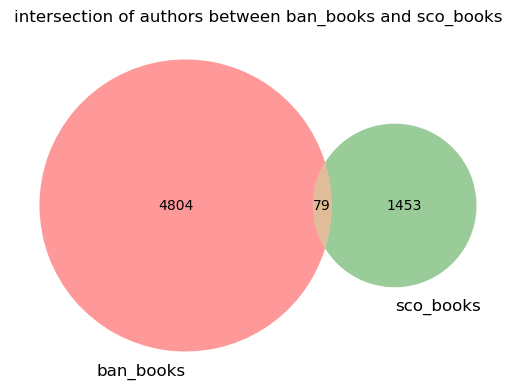

In [9]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

ban_unique_authors = len(set(sco_members_aut['sort_name']))
sco_unique_authors = len(set(sco_books_aut_unique['sco_author']))

intersection_authors = len(set(sco_members_aut['sort_name']).intersection(set(sco_books_aut_unique['sco_author'])))

venn2(subsets=(ban_unique_authors, sco_unique_authors, intersection_authors),
      set_labels=('ban_books', 'sco_books'))

plt.title('intersection of authors between ban_books and sco_books')
plt.show()

In [10]:
sco_members_aut.rename(columns={'author': 'sco_member'}, inplace=True)

sco_books_aut_unique.rename(columns={'author': 'sco_author'}, inplace=True)

merged_df = pd.merge(sco_members_aut, sco_books_aut_unique, how='outer', left_on='sort_name', right_on='sco_author')

no_intersection_df = merged_df.dropna(subset=['sort_name', 'sco_author'])

no_intersection_df.reset_index(drop=True, inplace=True) # to avoid confusion later on
no_intersection_df = no_intersection_df[['sco_author','sort_name']]

print(no_intersection_df)


               sco_author              sort_name
0      Aldington, Richard     Aldington, Richard
1   Anderson, Margaret C.  Anderson, Margaret C.
2         Antheil, George        Antheil, George
3           Aragon, Louis          Aragon, Louis
4            Asch, Nathan           Asch, Nathan
..                    ...                    ...
74       Wescott, Glenway       Wescott, Glenway
75       Wilder, Thornton       Wilder, Thornton
76       Wilson, Margaret       Wilson, Margaret
77          Wilson, Romer          Wilson, Romer
78        Wright, Richard        Wright, Richard

[79 rows x 2 columns]


C:\Users\dittm\AppData\Local\Temp\ipykernel_17884\1968863591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sco_books_aut_unique.rename(columns={'author': 'sco_author'}, inplace=True)


In [12]:
no_intersection_df.sample(30)

,sco_author,sort_name
67,"Solano, Solita","Solano, Solita"
32,"Gascoyne, David","Gascoyne, David"
26,"Eastman, Max","Eastman, Max"
18,"Callaghan, Morley","Callaghan, Morley"
75,"Wilder, Thornton","Wilder, Thornton"
49,"Lewisohn, Ludwig","Lewisohn, Ludwig"
78,"Wright, Richard","Wright, Richard"
37,"Gorman, Herbert Sherman","Gorman, Herbert Sherman"
60,"Paul, Elliot","Paul, Elliot"
30,"Flandrau, Grace","Flandrau, Grace"
